<a href="https://colab.research.google.com/github/Aswinramesh04/100-DaysOfCode-DataScience/blob/main/36_Day36_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                              Logistic Regression       By: Loga Aswin

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("/content/weather.csv")

In [9]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [12]:
df.size

8052

In [13]:
df.shape

(366, 22)

In [14]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

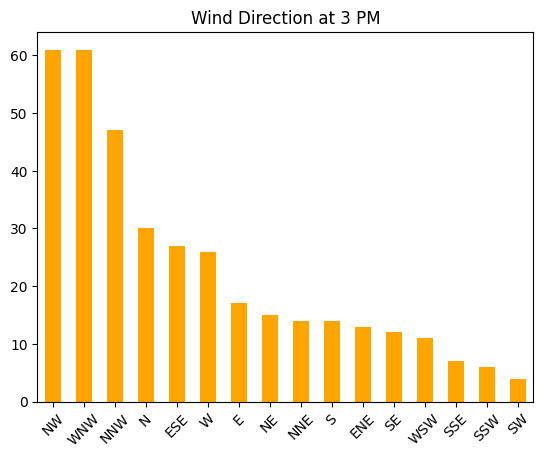

In [24]:
df['WindDir3pm'].value_counts().plot(kind="bar", color='orange')
plt.title("Wind Direction at 3 PM")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

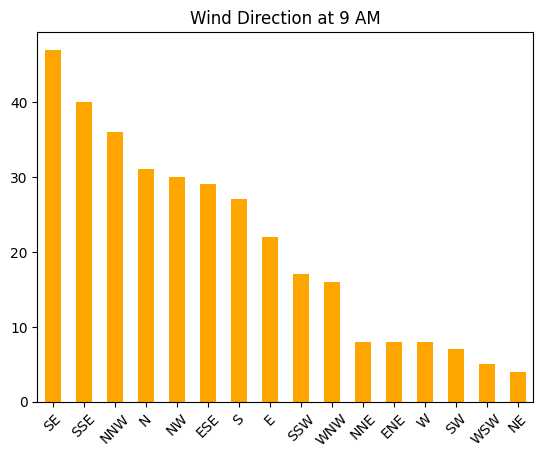

In [25]:
df['WindDir9am'].value_counts().plot(kind="bar", color='orange')
plt.title("Wind Direction at 9 AM")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

**Transform categorical data into numerical values in a DataFrame**

In [26]:
df['RainToday']=df['RainToday'].apply(lambda x:1 if x == "Yes" else 0)

In [27]:
df['RainTomorrow']=df['RainTomorrow'].apply(lambda x:1 if x == "Yes" else 0)

In [28]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


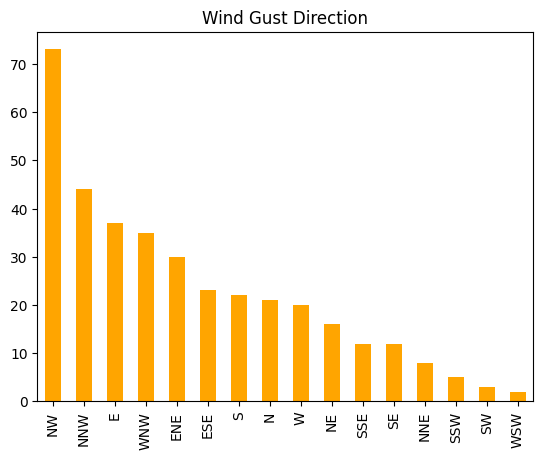

In [29]:
df.WindGustDir.value_counts().plot(kind = "bar",color = 'orange')
plt.title("Wind Gust Direction")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df=df.dropna()

In [31]:
df.shape

(328, 22)

In [32]:
df.WindGustDir = le.fit_transform(df.WindGustDir)
df.WindDir3pm = le.fit_transform(df.WindDir3pm)
df.WindDir9am = le.fit_transform(df.WindDir9am)

In [33]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,6.192073,40.396341,7.067073,7.512195,10.414634,...,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,0.185976,1.422561,0.182927
std,5.945199,6.707310,4.289427,2.681183,3.506646,4.337765,13.132176,3.897197,4.560819,7.811544,...,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,0.389681,4.234023,0.387197
min,-5.300000,7.600000,0.000000,0.200000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000,0.000000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,2.000000,31.000000,3.000000,4.000000,6.000000,...,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000,0.000000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,6.500000,39.000000,7.500000,7.000000,7.000000,...,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000,0.000000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,8.000000,46.000000,10.000000,13.000000,13.000000,...,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.000000,0.200000,0.000000
max,20.900000,35.800000,39.800000,13.800000,13.600000,15.000000,98.000000,15.000000,15.000000,41.000000,...,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,1.000000,39.800000,1.000000


In [34]:
#Training and Testing
from sklearn.model_selection import train_test_split
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [50]:
train_x , train_y ,test_x , test_y = train_test_split(x,y , test_size = 0.2,random_state = 2)

In [53]:
train_x.shape

(262, 21)

In [54]:
train_y.shape

(66, 21)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x , test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
predict = model.predict(train_y)

In [60]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(predict, y_test)
score

0.9696969696969697

In [62]:
report = classification_report(predict, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       0.82      1.00      0.90         9

    accuracy                           0.97        66
   macro avg       0.91      0.98      0.94        66
weighted avg       0.98      0.97      0.97        66

